In [27]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/datc/opschaler/combined_dfs_gas_smart_weather/P01S01W5339.csv',header=0,delimiter='\t')


In [28]:
df.head()

datetime    eMeter  eMeterReturn  eMeterLow  eMeterLowReturn  \
0  2017-04-24 12:00:40  2658.613      4478.573   4032.529         1875.678   
1  2017-04-24 12:00:50  2658.613      4478.577   4032.529         1875.678   
2  2017-04-24 12:01:00  2658.614      4478.579   4032.529         1875.678   
3  2017-04-24 12:01:10  2658.616      4478.580   4032.529         1875.678   
4  2017-04-24 12:01:20  2658.616      4478.583   4032.529         1875.678   

   ePower  ePowerReturn     gasMeter  gasPower          DD  ...    \
0     0.0        1343.0  2621.541078  0.000019  263.006667  ...     
1     0.0        1366.0  2621.541097  0.000019  262.933333  ...     
2  1069.0           0.0  2621.541117  0.000019  262.860000  ...     
3     0.0        1123.0  2621.541136  0.000019  262.786667  ...     
4     0.0        1177.0  2621.541156  0.000019  262.713333  ...     

             P           Q   RG        SQ     T    T10        TD          U  \
0  1013.793333  536.333333  0.0  3.086220  13.0  14.04  5.926667  62.066667   
1  1013.791667  536.166667  0.0  3.083125  13.0  14.05  5.933333  62.083333   
2  1013.790000  536.000000  0.0  3.080030  13.0  14.06  5.940000  62.100000   
3  1013.788333  535.833333  0.0  3.076935  13.0  14.07  5.946667  62.116667   
4  1013.786667  535.666667  0.0  3.073840  13.0  14.08  5.953333  62.133333   

             VV     WW  
0  44533.333333  21.60  
1  44516.666667  21.25  
2  44500.000000  20.90  
3  44483.333333  20.55  
4  44466.666667  20.20  

[5 rows x 24 columns]

In [32]:
df['Q'].replace(" ","")
df['T'].replace(" ","")
df['gasPower'].replace(" ","")

GP = df['gasPower']
Q = df['Q']
T = df['T']


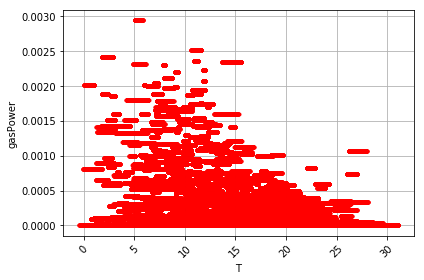

In [34]:
plt.plot(df['T'], df['gasPower'], '.', color='r')
plt.xlabel('T')
plt.ylabel('gasPower')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
#plt.savefig('sample2.png', dpi=1000)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# X and Y Values
X = df[['T','Q']]
Y = GP

regr = LinearRegression()#Create an object of type LinearRegression()
regr.fit(X,Y)#Fit the data for the 3 variables

print('Intercept: \n', regr.intercept_)#The intercept is the expected mean value of Y when all X=0
print('Coefficients: \n', regr.coef_)#Coefficients of the equation that fit the data

#Code that displays a table with statistical info
X = sm.add_constant(X)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ValueError: Found input variables with inconsistent numbers of samples: [1825917, 720516]

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure()
ax = plt.axes(projection='3d')

